Title Of The Project:
Servo Prediction Using Linear regression.

Data Source - YBI Foundation


In [60]:
#import Libraries
import pandas as pd
import numpy as np
import re

In [4]:
# import data Source
servo = pd.read_csv('Servo Mechanism.csv')

In [5]:
#Get the five rows of the data
servo.head()

,Motor,Screw,Pgain,Vgain,Class
0,E,E,5,4,4
1,B,D,6,5,11
2,D,D,4,3,6
3,B,A,3,2,48
4,D,B,6,5,6


In [28]:
#Getting the Info
servo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Motor   167 non-null    object
 1   Screw   167 non-null    object
 2   Pgain   167 non-null    int64 
 3   Vgain   167 non-null    int64 
 4   Class   167 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 6.6+ KB


In [3]:
#Describe Data
servo.describe

<bound method NDFrame.describe of     Motor Screw  Pgain  Vgain  Class
0       E     E      5      4      4
1       B     D      6      5     11
2       D     D      4      3      6
3       B     A      3      2     48
4       D     B      6      5      6
..    ...   ...    ...    ...    ...
162     B     C      3      2     44
163     B     E      3      1     40
164     C     D      4      3     25
165     A     B      3      2     44
166     A     A      6      5     20

[167 rows x 5 columns]>

In [8]:
#Getting the columns
servo.columns


Index(['Motor', 'Screw', 'Pgain', 'Vgain', 'Class'], dtype='object')

In [9]:
#Getting the shape
servo.shape

(167, 5)

In [11]:
# getting categories and Counts
servo[['Motor']].value_counts()

Motor
C        40
A        36
B        36
E        33
D        22
Name: count, dtype: int64

In [14]:
servo[['Screw']].value_counts()



Screw
A        42
B        35
C        31
D        30
E        29
Name: count, dtype: int64

In [79]:
servo.replace({'Screw':{'A':0,'B':1,'C':2,'D':3,'E':4}},inplace=True)

In [80]:
servo.replace({'Motor':{'A':0,'B':1,'C':2,'D':3,'E':4}},inplace=True)

In [16]:
 # Defining the y and x variables
 y = servo ['Class']


In [81]:
y.shape

(167,)

In [82]:
y

0       4
1      11
2       6
3      48
4       6
       ..
162    44
163    40
164    25
165    44
166    20
Name: Class, Length: 167, dtype: int64

In [71]:
X = servo[['Motor','Screw','Pgain','Vgain']]

In [72]:
X.shape

(167, 4)

In [73]:
X

,Motor,Screw,Pgain,Vgain
0,4,4,5,4
1,1,3,6,5
2,3,3,4,3
3,1,0,3,2
4,3,1,6,5
...,...,...,...,...
162,1,2,3,2
163,1,4,3,1
164,2,3,4,3
165,0,1,3,2


In [74]:
#Get the train Test split
from sklearn.model_selection import train_test_split

In [88]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=2529)

In [76]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((116, 4), (51, 4), (116,), (51,))

In [84]:
#Getting the model train
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [85]:
model.fit

<bound method LinearRegression.fit of LinearRegression()>

In [86]:
X_train

,Motor,Screw,Pgain,Vgain
76,E,C,4,1
159,A,A,5,4
157,A,B,3,1
120,B,B,4,1
10,B,E,6,5
...,...,...,...,...
72,C,B,5,4
143,A,B,4,2
60,E,B,4,2
50,D,A,6,5


In [90]:
y_train

76      4
159    20
157    45
120    13
10      9
       ..
72     12
143    20
60     13
50      8
96     23
Name: Class, Length: 116, dtype: int64

In [91]:
model.fit(X_train,y_train)

LinearRegression()

In [92]:
#Get the model predict
y_pred = model.predict(X_test)

In [93]:
y_pred.shape

(51,)

In [94]:
y_pred

array([24.55945258, 30.98765106, 18.54485477, 25.51524243, 38.56082023,
       23.52007775, 11.61947065, 20.03335614, 40.60404401, 41.7009556 ,
       13.66269443, 26.01242807, 16.50163099, 16.54663453, 21.92598051,
       22.52570646, -5.46449561, 30.68912392, 32.7323477 ,  1.41282941,
       33.97718702, 31.63543611, 33.52806048, 30.04133887, 19.38557109,
        6.49364826, 28.5528375 , 17.04382017, 25.06611589,  3.50411229,
       30.59606128, 23.67067716, 35.72188367, 32.08456265, 12.46018697,
        3.6547117 , 23.47201865, 33.03087484, 17.49294672, 37.61450804,
       27.54898855, 22.07657992, 11.51387478,  9.470651  , 30.53852451,
       28.64590014, 33.67865989,  4.60102388, 24.1198037 , 21.13026773,
       25.71390094])

In [95]:
#Get Model Evaluation
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [96]:
mean_squared_error(y_test,y_pred)

66.03589175595563

In [97]:
mean_absolute_error(y_test,y_pred)

7.190539677251235

In [98]:
r2_score(y_test,y_pred)

0.6807245170563927

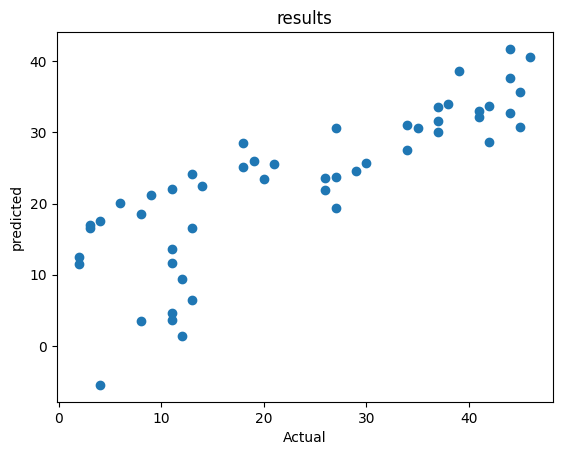

In [101]:
#Visualization of results
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("predicted")
plt.title("results")
plt.show()


In [102]:
model.intercept_

79.29807295805837

In [103]:
model.coef_

array([ -2.04322378,  -2.98953597, -14.59161593,   4.5836332 ])